In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from feature_extract import SignalFeatureExtractor

In [ ]:
mpa = pd.read_table('../data/data_sps.txt', sep=' ')
mpa['start_time'] = pd.to_datetime(mpa['start_time'])
print(mpa.shape)
mpa.head(4)

In [ ]:
extractor = SignalFeatureExtractor(raw_data_path='../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd', 
                                   extract_chromafeatures=True, 
                                   n_processes=7)

In [ ]:
foo = extractor.extract(processed_data=mpa)

In [ ]:
foo.head()
foo.shape

In [ ]:
foo.isnull().sum()

## Wavelet Features

In [2]:
from feature_extract import SignalFeatureExtractor
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [19]:
#df = pd.read_table('../data/data_mpa.txt', sep=' ')
#df = pd.read_table('../data/data_spg.txt', sep=' ')
df = pd.read_table('../data/data_sps.txt', sep=' ')

In [20]:
#fp_raw = '../data/raw_packets_obernach_MP_0.24_2510.vlnd'
#fp_raw = '../data/raw_packets_obernach_GP_0.02_2510.vlnd'
fp_raw = '../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd'

extractor = SignalFeatureExtractor(raw_data_path=fp_raw,
                                   extract_chromafeatures=False, n_processes=6)

SignalFeatureExtractor:  {'raw_data_path': '../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd', 'extract_chromafeatures': False, 'n_processes': 6}


In [21]:
def wavelet_feature_extraction(sample):
    # generate List from string
    sample = sample.split(' ')

    # Feature Extraction from list of strings
    start_time = sample[0] + ' ' + sample[1]
    packnr = sample[2]
    sensor = sample[3]
    package = np.array(sample[4:]).astype(float)
    wavelet_transform = pywt.dwt(package, 'db1')
    wavelet_mean_approx = np.mean(wavelet_transform[0])
    wavelet_med_approx = np.median(wavelet_transform[0])
    wavelet_var_approx = np.var(wavelet_transform[0])
    wavelet_mean_coef = np.mean(wavelet_transform[0])
    wavelet_med_coef = np.median(wavelet_transform[0])
    wavelet_var_coef = np.var(wavelet_transform[0])
    #wavelet_std = np.std(wavelet_transform)
    #wavelet_q25 = np.quantile(a=wavelet, q=.25)
    #wavelet_q75 = np.quantile(a=wavelet, q=.75)

    # Create Dictionary
    data_dict = dict(start_time=start_time, packnr=packnr, sensor_type=sensor,
                     wavelet_mean_approx=wavelet_mean_approx, wavelet_med_approx=wavelet_med_approx,
                     wavelet_var_approx=wavelet_var_approx, wavelet_mean_coef=wavelet_mean_coef,
                     wavelet_med_coef=wavelet_med_coef, wavelet_var_coef=wavelet_var_coef)
    return data_dict

In [22]:
data_extract = extractor.extract_with_custom_func(processed_data=df, custom_func=wavelet_feature_extraction)

INFO || 21.12.17_08:59 | Load Raw Data
INFO || 21.12.17_08:59 | Extracting from Raw
INFO || 21.12.17_08:59 | Transform Features
INFO || 21.12.17_08:59 | Joining new Features


In [23]:
data_extract.head(2)

,start_time,packnr,velocity,size_mm,centroid_frequency_G01,centroid_frequency2_G01,centroid_frequency_G02,centroid_frequency2_G02,centroid_frequency_M01,centroid_frequency2_M01,centroid_frequency_S01,centroid_frequency2_S01,median_freq_G01,median_freq_G02,median_freq_M01,median_freq_S01,flash_ind_G01,flash_ind_G02,flash_ind_M01,flash_ind_S01,cv_G01,cv_G02,cv_M01,cv_S01,iqa_G01,iqa_G02,iqa_M01,iqa_S01,mab_G01,mab_G02,mab_M01,mab_S01,imp_G01,imp_G02,imp_M01,imp_S01,len_G01,len_G02,len_M01,len_S01,wavelet_mean_approx_G01,wavelet_mean_approx_G02,wavelet_mean_approx_M01,wavelet_mean_approx_S01,wavelet_med_approx_G01,wavelet_med_approx_G02,wavelet_med_approx_M01,wavelet_med_approx_S01,wavelet_var_approx_G01,wavelet_var_approx_G02,wavelet_var_approx_M01,wavelet_var_approx_S01,wavelet_mean_coef_G01,wavelet_mean_coef_G02,wavelet_mean_coef_M01,wavelet_mean_coef_S01,wavelet_med_coef_G01,wavelet_med_coef_G02,wavelet_med_coef_M01,wavelet_med_coef_S01,wavelet_var_coef_G01,wavelet_var_coef_G02,wavelet_var_coef_M01,wavelet_var_coef_S01
0,2021-06-22 15:34:38,1,2.05,12.3,8153.438439,7257.609334,8209.713177,7379.284623,7371.324388,2679.227894,6475.116681,3302.480303,7621.698593,7703.227327,6483.983503,5674.218237,0.002570,0.002471,0.008534,0.004337,0.674025,0.654932,1.337432,1.038010,1.167040e-07,7.746436e-08,2.586849e-07,0.034014,0.045203,0.036538,0.030517,18,1,1,0,0,73,73,73,73,0.002785,0.002233,-0.013705,4.643972,0.002274,0.001453,-0.021579,4.242641,0.000071,0.000047,0.000092,17.771366,0.002785,0.002233,-0.013705,4.643972,0.002274,0.001453,-0.021579,4.242641,0.000071,0.000047,0.000092,17.771366
1,2021-06-22 15:34:38,2,2.05,12.3,3450.442567,2618.793204,4212.339529,1687.358524,7086.113317,6697.399727,7301.457307,5199.687184,2680.641145,2438.875910,6743.588474,6302.180373,0.007678,0.013979,0.006784,0.014169,2.432687,2.170305,2.258637,1.021832,2.902270e-07,9.641377e-09,1.837043e-03,0.540045,0.033590,0.003931,2.715982,37,0,0,10,7,139,139,139,139,-0.001586,-0.001565,-0.017571,-2.676904,-0.001990,-0.001927,-0.021579,-4.242641,0.000174,0.000003,0.914387,287.655612,-0.001586,-0.001565,-0.017571,-2.676904,-0.001990,-0.001927,-0.021579,-4.242641,0.000174,0.000003,0.914387,287.655612


In [24]:
#filename = '../data/data_wavelet_mpa.txt'
#filename = '../data/data_wavelet_spg.txt'
filename = '../data/data_wavelet_sps.txt'
data_extract.to_csv(filename, sep=' ', index=False)

## 1-Sample Wavelet

In [147]:
raw_data = extractor.load_raw_as_list(fp=fp_raw)

In [148]:
sample_id = 1000
sample = raw_data[sample_id]
package = sample.split(' ')[4:] 

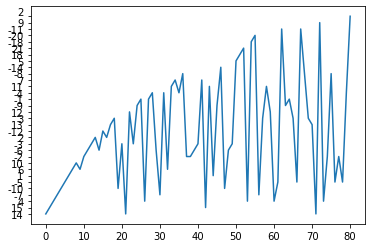

In [149]:
plt.plot(np.arange(len(package)), package)

In [150]:
pywt.wavelist()[:5]

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4']

In [160]:
sample = raw_data[sample_id]
package = sample.split(' ')[4:]
wavelet = pywt.dwt(data=package, wavelet='db1', mode='zero', axis=-1)

In [166]:
np.mean(wavelet)

0.08623253429104222

In [159]:
skew(wavelet[1])

0.25668015253138804

(array([ 1.,  1.,  7.,  4.,  8., 16.,  2.,  0.,  5.,  6.]),
 array([-24.59495824, -19.98187862, -15.368799  , -10.75571938,
         -6.14263976,  -1.52956014,   3.08351948,   7.6965991 ,
         12.30967873,  16.92275835,  21.53583797]),
 <BarContainer object of 10 artists>)

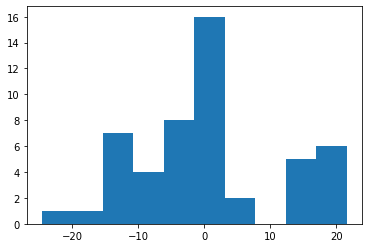

In [155]:
plt.hist(wavelet[0])

(array([ 2.,  3.,  7.,  5., 17.,  6.,  6.,  2.,  1.,  1.]),
 array([-5.4630857 , -4.23530496, -3.00752422, -1.77974348, -0.55196273,
         0.67581801,  1.90359875,  3.13137949,  4.35916024,  5.58694098,
         6.81472172]),
 <BarContainer object of 10 artists>)

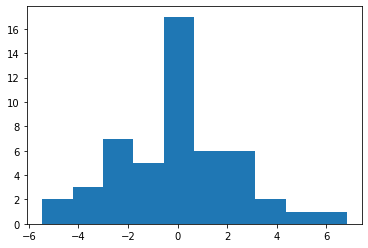

In [156]:
plt.hist(wavelet[1])

<AxesSubplot:>

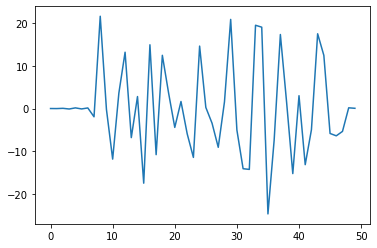

In [75]:
sns.lineplot(np.arange(len(wavelet[0])), wavelet[0])

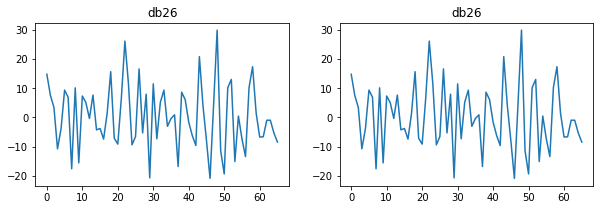

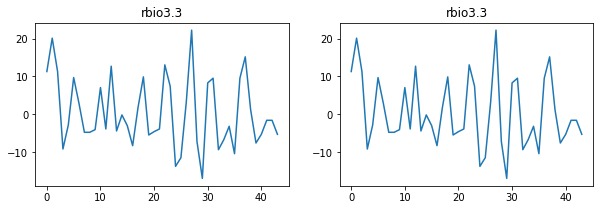

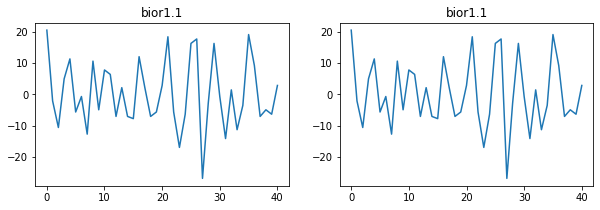

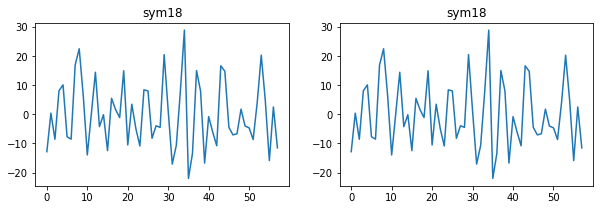

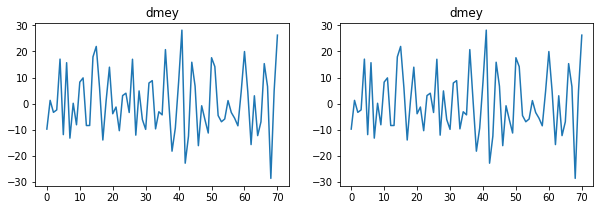

In [83]:
for wave in np.random.choice(pywt.wavelist(), 5):
    fig, ax = plt.subplots(1,2, figsize=(10,3))
    try: 
        w = pywt.Wavelet(wave)
        sample = raw_data[sample_id]
        package = sample.split(' ')[4:]
        wavelet_transform = pywt.dwt(package, w)
        p1 = sns.lineplot(np.arange(len(wavelet_transform[0])), wavelet_transform[0], ax=ax[0])
        p1.set_title(wave)
        p2 = sns.lineplot(np.arange(len(wavelet_transform[0])), wavelet_transform[0], ax=ax[1])
        p2.set_title(wave)
        plt.show()
    except:
        continue

## 1-Sample ZCR

In [25]:
from librosa.feature import zero_crossing_rate

In [40]:
#df = pd.read_table('../data/data_wavelet_mpa.txt', sep=' ')
#df = pd.read_table('../data/data_wavelet_spg.txt', sep=' ')
df = pd.read_table('../data/data_wavelet_sps.txt', sep=' ')

In [39]:
#fp_raw = '../data/raw_packets_obernach_MP_0.24_2510.vlnd'
#fp_raw = '../data/raw_packets_obernach_GP_0.02_2510.vlnd'
fp_raw = '../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd'

extractor = SignalFeatureExtractor(raw_data_path=fp_raw,
                                   extract_chromafeatures=False, n_processes=6)

SignalFeatureExtractor:  {'raw_data_path': '../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd', 'extract_chromafeatures': False, 'n_processes': 6}


In [125]:
raw_data = extractor.load_raw_as_list(fp=fp_raw)

In [126]:
sample_id = 1000
sample = raw_data[sample_id]
package = np.array(sample.split(' ')[4:]).astype(float)
package

array([ 14.,  15.,   4.,  -7., -10.,  -5.,   1.,   6.,  10.,   6.,  -2.,
        -6.,  -3.,   2.,  -6., -12.,   2.,  13.,   3., -10.,  -3.,  14.,
        12.,  -3.,  -9.,  -1.,   4.,  -1.,  -4.,  -6.,  -7.,  -4.,   6.,
        11.,   7.,  -4.,  -8.,  -2.,  -2.,  -6.,  -3.,   7.,  15.,  11.,
         1.,  -9., -14., -10.,  -6.,  -3.,   5.,  18.,  21.,   4., -18.,
       -20.,  -7.,   3.,  11.,  12.,   4.,  -5., -11.,  -9.,  -1.,   3.,
        -5., -11.,  -8.,   3.,  13.,  14.,   9.,   4.,  -2.,  -8.,  -5.,
        -2.,  -5.,  -4.,   2.])

In [127]:
package.shape

(81,)

In [128]:
zero_crossing_rate(package, frame_length=package.shape[0])[0][0]

0.16049382716049382

In [41]:
def calculate_zero_crossing_rate(sample: str):
    # generate List from string
    sample = sample.split(' ')

    # Feature Extraction from list of strings
    start_time = sample[0] + ' ' + sample[1]
    packnr = sample[2]
    sensor = sample[3]
    package = np.array(sample[4:]).astype(float)
    zcr = zero_crossing_rate(package, frame_length=package.shape[0])[0][0]
    # Create Dictionary
    data_dict = dict(start_time=start_time, packnr=packnr, sensor_type=sensor,
                     zcr=zcr)
    return data_dict

In [42]:
data_extract = extractor.extract_with_custom_func(processed_data=df, custom_func=calculate_zero_crossing_rate)

INFO || 21.12.17_09:07 | Load Raw Data
INFO || 21.12.17_09:07 | Extracting from Raw
INFO || 21.12.17_09:07 | Transform Features
INFO || 21.12.17_09:07 | Joining new Features


In [43]:
data_extract.head(2)

,start_time,packnr,velocity,size_mm,centroid_frequency_G01,centroid_frequency2_G01,centroid_frequency_G02,centroid_frequency2_G02,centroid_frequency_M01,centroid_frequency2_M01,centroid_frequency_S01,centroid_frequency2_S01,median_freq_G01,median_freq_G02,median_freq_M01,median_freq_S01,flash_ind_G01,flash_ind_G02,flash_ind_M01,flash_ind_S01,cv_G01,cv_G02,cv_M01,cv_S01,iqa_G01,iqa_G02,iqa_M01,iqa_S01,mab_G01,mab_G02,mab_M01,mab_S01,imp_G01,imp_G02,imp_M01,imp_S01,len_G01,len_G02,len_M01,len_S01,wavelet_mean_approx_G01,wavelet_mean_approx_G02,wavelet_mean_approx_M01,wavelet_mean_approx_S01,wavelet_med_approx_G01,wavelet_med_approx_G02,wavelet_med_approx_M01,wavelet_med_approx_S01,wavelet_var_approx_G01,wavelet_var_approx_G02,wavelet_var_approx_M01,wavelet_var_approx_S01,wavelet_mean_coef_G01,wavelet_mean_coef_G02,wavelet_mean_coef_M01,wavelet_mean_coef_S01,wavelet_med_coef_G01,wavelet_med_coef_G02,wavelet_med_coef_M01,wavelet_med_coef_S01,wavelet_var_coef_G01,wavelet_var_coef_G02,wavelet_var_coef_M01,wavelet_var_coef_S01,zcr_G01,zcr_G02,zcr_M01,zcr_S01
0,2021-06-22 15:34:38,1,2.05,12.3,8153.438439,7257.609334,8209.713177,7379.284623,7371.324388,2679.227894,6475.116681,3302.480303,7621.698593,7703.227327,6483.983503,5674.218237,0.002570,0.002471,0.008534,0.004337,0.674025,0.654932,1.337432,1.038010,1.167040e-07,7.746436e-08,2.586849e-07,0.034014,0.045203,0.036538,0.030517,18,1,1,0,0,73,73,73,73,0.002785,0.002233,-0.013705,4.643972,0.002274,0.001453,-0.021579,4.242641,0.000071,0.000047,0.000092,17.771366,0.002785,0.002233,-0.013705,4.643972,0.002274,0.001453,-0.021579,4.242641,0.000071,0.000047,0.000092,17.771366,0.109589,0.109589,0.164384,0.082192
1,2021-06-22 15:34:38,2,2.05,12.3,3450.442567,2618.793204,4212.339529,1687.358524,7086.113317,6697.399727,7301.457307,5199.687184,2680.641145,2438.875910,6743.588474,6302.180373,0.007678,0.013979,0.006784,0.014169,2.432687,2.170305,2.258637,1.021832,2.902270e-07,9.641377e-09,1.837043e-03,0.540045,0.033590,0.003931,2.715982,37,0,0,10,7,139,139,139,139,-0.001586,-0.001565,-0.017571,-2.676904,-0.001990,-0.001927,-0.021579,-4.242641,0.000174,0.000003,0.914387,287.655612,-0.001586,-0.001565,-0.017571,-2.676904,-0.001990,-0.001927,-0.021579,-4.242641,0.000174,0.000003,0.914387,287.655612,0.050360,0.021583,0.122302,0.122302


In [44]:
#filename = '../data/data_wavelet_zcr_mpa.txt'
#filename = '../data/data_wavelet_zcr_spg.txt'
#filename = '../data/data_wavelet_zcr_sps.txt'
data_extract.to_csv(filename, sep=' ', index=False)

## Peak-Valley Value

In [81]:
def peak_valley_value(sample: str):
    # generate List from string
    sample = sample.split(' ')

    # Feature Extraction from list of strings
    start_time = sample[0] + ' ' + sample[1]
    packnr = sample[2]
    sensor = sample[3]
    package = np.array(sample[4:]).astype(float)
    peak_valley_value = np.max(package) - np.min(package)
    # Create Dictionary
    data_dict = dict(start_time=start_time, packnr=packnr, sensor_type=sensor,
                     peak_valley_value=peak_valley_value)
    return data_dict

In [82]:
df = pd.read_table('../data/data_wavelet_zcr_mpa.txt', sep=' ')
#df = pd.read_table('../data/data_wavelet_zcr_spg.txt', sep=' ')
#df = pd.read_table('../data/data_wavelet_zcr_sps.txt', sep=' ')

In [83]:
fp_raw = '../data/raw_packets_obernach_MP_0.24_2510.vlnd'
#fp_raw = '../data/raw_packets_obernach_GP_0.02_2510.vlnd'
#fp_raw = '../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd'

extractor = SignalFeatureExtractor(raw_data_path=fp_raw,
                                   extract_chromafeatures=False, 
                                   n_processes=6)

SignalFeatureExtractor:  {'raw_data_path': '../data/raw_packets_obernach_MP_0.24_2510.vlnd', 'extract_chromafeatures': False, 'n_processes': 6}


In [84]:
data_extract = extractor.extract_with_custom_func(processed_data=df, custom_func=peak_valley_value)

INFO || 21.12.17_11:15 | Load Raw Data
INFO || 21.12.17_11:15 | Extracting from Raw
INFO || 21.12.17_11:16 | Transform Features
INFO || 21.12.17_11:16 | Joining new Features


In [85]:
# Check features
data_extract.head(2)

,start_time,packnr,velocity,size_mm,centroid_frequency_M01,centroid_frequency2_M01,centroid_frequency_M02,centroid_frequency2_M02,centroid_frequency_M03,centroid_frequency2_M03,centroid_frequency_M04,centroid_frequency2_M04,median_freq_M01,median_freq_M02,median_freq_M03,median_freq_M04,flash_ind_M01,flash_ind_M02,flash_ind_M03,flash_ind_M04,cv_M01,cv_M02,cv_M03,cv_M04,iqa_M01,iqa_M02,iqa_M03,iqa_M04,mab_M01,mab_M02,mab_M03,mab_M04,imp_M01,imp_M02,imp_M03,imp_M04,len_M01,len_M02,len_M03,len_M04,wavelet_mean_approx_M01,wavelet_mean_approx_M02,wavelet_mean_approx_M03,wavelet_mean_approx_M04,wavelet_med_approx_M01,wavelet_med_approx_M02,wavelet_med_approx_M03,wavelet_med_approx_M04,wavelet_var_approx_M01,wavelet_var_approx_M02,wavelet_var_approx_M03,wavelet_var_approx_M04,wavelet_mean_coef_M01,wavelet_mean_coef_M02,wavelet_mean_coef_M03,wavelet_mean_coef_M04,wavelet_med_coef_M01,wavelet_med_coef_M02,wavelet_med_coef_M03,wavelet_med_coef_M04,wavelet_var_coef_M01,wavelet_var_coef_M02,wavelet_var_coef_M03,wavelet_var_coef_M04,zcr_M01,zcr_M02,zcr_M03,zcr_M04,peak_valley_value_M01,peak_valley_value_M02,peak_valley_value_M03,peak_valley_value_M04
0,2018-09-25 09:17:47,1,1.55,12.3,2904.461291,3295.473828,2774.005720,2978.700293,2695.615717,2927.095558,2826.315035,3061.944796,3105.963785,2927.665619,2897.265451,3102.096379,0.003316,0.003135,0.001323,0.003481,0.600818,0.535403,0.870868,0.640243,3.904208e-08,7.449861e-08,0.000035,7.180763e-08,0.007383,0.010306,0.297658,0.009521,0,0,2,0,41,41,41,41,0.000318,0.000049,-0.000013,-0.001907,0.000343,-0.000566,0.001982,-0.002589,0.000006,0.000012,0.010168,0.000014,0.000318,0.000049,-0.000013,-0.001907,0.000343,-0.000566,0.001982,-0.002589,0.000006,0.000012,0.010168,0.000014,0.170732,0.292683,0.341463,0.317073,0.013720,0.017748,0.560865,0.015938
1,2018-09-25 09:17:47,2,1.55,12.3,2597.393898,2779.013129,2896.153838,3323.666289,2966.569484,3041.924425,2715.497321,2918.155807,2783.164958,3271.880998,3028.421043,2833.174972,0.002383,0.001750,0.001530,0.002993,0.534952,0.551811,1.036189,0.468263,1.705021e-08,4.513775e-08,0.000015,5.465064e-08,0.006142,0.009462,0.217281,0.009715,0,0,0,0,37,37,37,37,0.000140,-0.000982,0.000597,-0.000454,0.000366,-0.001216,0.000633,0.000345,0.000002,0.000008,0.002472,0.000013,0.000140,-0.000982,0.000597,-0.000454,0.000366,-0.001216,0.000633,0.000345,0.000002,0.000008,0.002472,0.000013,0.297297,0.297297,0.297297,0.351351,0.009977,0.016099,0.417822,0.018453


In [86]:
filename = '../data/data_wavelet_zcr_pv_mpa.txt'
#filename = '../data/data_wavelet_zcr_pv_spg.txt'
#filename = '../data/data_wavelet_zcr_pv_sps.txt'
data_extract.to_csv(filename, sep=' ', index=False)

# Root Mean Square Energy

https://musicinformationretrieval.com/energy.html#:~:text=The%20root%2Dmean%2Dsquare%20energy,x%2C%20sr%20%3D%20librosa.

In [65]:
def root_mean_square_energy(sample: str):
    # generate List from string
    sample = sample.split(' ')

    # Feature Extraction from list of strings
    start_time = sample[0] + ' ' + sample[1]
    packnr = sample[2]
    sensor = sample[3]
    package = np.array(sample[4:]).astype(float)
    
    root_mean_square_energy = np.sqrt(np.mean(package**2))
    
    # Create Dictionary
    data_dict = dict(start_time=start_time, packnr=packnr, sensor_type=sensor,
                     rmse=root_mean_square_energy)
    return data_dict

In [76]:
#df = pd.read_table('../data/data_wavelet_zcr_mpa.txt', sep=' ')
#df = pd.read_table('../data/data_wavelet_zcr_spg.txt', sep=' ')
df = pd.read_table('../data/data_wavelet_zcr_sps.txt', sep=' ')

In [77]:
#fp_raw = '../data/raw_packets_obernach_MP_0.24_2510.vlnd'
#fp_raw = '../data/raw_packets_obernach_GP_0.02_2510.vlnd'
fp_raw = '../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd'

extractor = SignalFeatureExtractor(raw_data_path=fp_raw,
                                   extract_chromafeatures=False, 
                                   n_processes=6)

SignalFeatureExtractor:  {'raw_data_path': '../data/raw_packets_obernach_SPS_20S01_0.5M01_0.03G02_0.03G01_5020.vlnd', 'extract_chromafeatures': False, 'n_processes': 6}


In [78]:
data_extract = extractor.extract_with_custom_func(processed_data=df, custom_func=root_mean_square_energy)

INFO || 21.12.17_09:36 | Load Raw Data
INFO || 21.12.17_09:36 | Extracting from Raw
INFO || 21.12.17_09:36 | Transform Features
INFO || 21.12.17_09:36 | Joining new Features


In [79]:
# Check features
data_extract.head(2)

,start_time,packnr,velocity,size_mm,centroid_frequency_G01,centroid_frequency2_G01,centroid_frequency_G02,centroid_frequency2_G02,centroid_frequency_M01,centroid_frequency2_M01,centroid_frequency_S01,centroid_frequency2_S01,median_freq_G01,median_freq_G02,median_freq_M01,median_freq_S01,flash_ind_G01,flash_ind_G02,flash_ind_M01,flash_ind_S01,cv_G01,cv_G02,cv_M01,cv_S01,iqa_G01,iqa_G02,iqa_M01,iqa_S01,mab_G01,mab_G02,mab_M01,mab_S01,imp_G01,imp_G02,imp_M01,imp_S01,len_G01,len_G02,len_M01,len_S01,wavelet_mean_approx_G01,wavelet_mean_approx_G02,wavelet_mean_approx_M01,wavelet_mean_approx_S01,wavelet_med_approx_G01,wavelet_med_approx_G02,wavelet_med_approx_M01,wavelet_med_approx_S01,wavelet_var_approx_G01,wavelet_var_approx_G02,wavelet_var_approx_M01,wavelet_var_approx_S01,wavelet_mean_coef_G01,wavelet_mean_coef_G02,wavelet_mean_coef_M01,wavelet_mean_coef_S01,wavelet_med_coef_G01,wavelet_med_coef_G02,wavelet_med_coef_M01,wavelet_med_coef_S01,wavelet_var_coef_G01,wavelet_var_coef_G02,wavelet_var_coef_M01,wavelet_var_coef_S01,zcr_G01,zcr_G02,zcr_M01,zcr_S01,rmse_G01,rmse_G02,rmse_M01,rmse_S01
0,2021-06-22 15:34:38,1,2.05,12.3,8153.438439,7257.609334,8209.713177,7379.284623,7371.324388,2679.227894,6475.116681,3302.480303,7621.698593,7703.227327,6483.983503,5674.218237,0.002570,0.002471,0.008534,0.004337,0.674025,0.654932,1.337432,1.038010,1.167040e-07,7.746436e-08,2.586849e-07,0.034014,0.045203,0.036538,0.030517,18,1,1,0,0,73,73,73,73,0.002785,0.002233,-0.013705,4.643972,0.002274,0.001453,-0.021579,4.242641,0.000071,0.000047,0.000092,17.771366,0.002785,0.002233,-0.013705,4.643972,0.002274,0.001453,-0.021579,4.242641,0.000071,0.000047,0.000092,17.771366,0.109589,0.109589,0.164384,0.082192,0.008397,0.006841,0.012501,4.532984
1,2021-06-22 15:34:38,2,2.05,12.3,3450.442567,2618.793204,4212.339529,1687.358524,7086.113317,6697.399727,7301.457307,5199.687184,2680.641145,2438.875910,6743.588474,6302.180373,0.007678,0.013979,0.006784,0.014169,2.432687,2.170305,2.258637,1.021832,2.902270e-07,9.641377e-09,1.837043e-03,0.540045,0.033590,0.003931,2.715982,37,0,0,10,7,139,139,139,139,-0.001586,-0.001565,-0.017571,-2.676904,-0.001990,-0.001927,-0.021579,-4.242641,0.000174,0.000003,0.914387,287.655612,-0.001586,-0.001565,-0.017571,-2.676904,-0.001990,-0.001927,-0.021579,-4.242641,0.000174,0.000003,0.914387,287.655612,0.050360,0.021583,0.122302,0.122302,0.009596,0.001749,0.763434,13.089619


In [80]:
#filename = '../data/data_wavelet_zcr_pv_rmse_mpa.txt'
#filename = '../data/data_wavelet_zcr_pv_rmse_spg.txt'
filename = '../data/data_wavelet_zcr_pv_rmse_sps.txt'
data_extract.to_csv(filename, sep=' ', index=False)

# Signal Lookup

In [167]:
from feature_extract import SignalFeatureExtractor
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [168]:
sps = pd.read_table('../data/data_mpa.txt', sep=' ')

In [169]:
extractor = SignalFeatureExtractor(raw_data_path='../data/raw_packets_obernach_MP_0.24_2510.vlnd', extract_chromafeatures=False)

SignalFeatureExtractor:  {'raw_data_path': '../data/raw_packets_obernach_MP_0.24_2510.vlnd', 'extract_chromafeatures': False, 'n_processes': 3}


In [170]:
res = extractor.raw_lookup(start_time='2019-09-24 10:02:31', packnr='32', )

100%|██████████████████████████████████████████████████████████████████████| 702208/702208 [00:02<00:00, 310723.44it/s]


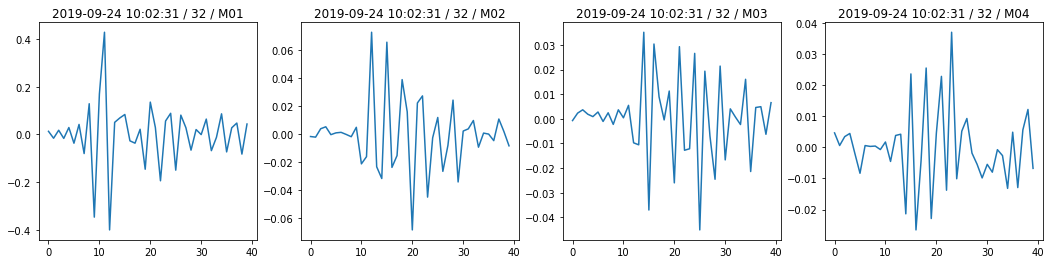

In [171]:
fig = plt.subplots(figsize=(18, 4))

for i, sample in enumerate(res):
    plt.subplot(1, len(res), i +1)
    plt.plot(sample['package'])
    plt.title(f"{sample['start_time']} / {sample['packnr']} / {sample['sensor']}")
plt.show()